In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.3.0


In [4]:
hello=tf.constant('Hello')
world=tf.constant('World')
print(hello)

Tensor("Const_2:0", shape=(), dtype=string)


In [6]:
type(world)

tensorflow.python.framework.ops.Tensor

In [8]:
with tf.Session() as sess:
    result= sess.run(hello+world)
    print(result)

b'HelloWorld'


In [9]:
tf_1,tf_2=tf.constant(1),tf.constant(2)
with tf.Session() as sess:
    print(sess.run(tf_1+tf_2))

3


In [10]:
cons=tf.constant(10)
mat=tf.fill((4,4),10)

In [11]:
zeros=tf.zeros((4,4))
ones=tf.ones((4,4))

In [12]:
myrandn=tf.random_normal((4,4),0,1,seed=100)
randu=tf.random_uniform((4,4),0,1,seed=100)

In [52]:
sess=tf.InteractiveSession()
ops=[cons,mat,zeros,myrandn,randu]
for op in ops:
    #op.eval()
    print(op.eval())

10
[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.08766998 -0.26517144 -0.99532986  0.5877223 ]
 [-1.02086735  0.40396553  0.49162239 -0.64681983]
 [-0.12439691  0.28154397  1.06456268  2.22469783]
 [-0.48822594  0.17635629 -1.82870567  0.51492119]]
[[ 0.96174979  0.44918132  0.51270759  0.83489168]
 [ 0.54734325  0.80996978  0.71889913  0.39656377]
 [ 0.95373368  0.93378425  0.04777336  0.07103348]
 [ 0.87394917  0.80516851  0.16453135  0.79368329]]


In [28]:
import numpy as np
a=tf.constant([[10,20],[30,40]],dtype=np.float32)
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [36]:
b=tf.constant([[30,40],[60,70]],dtype=np.float32)
c=tf.matmul(a,b)
ainv=tf.matrix_inverse(a)
binv=tf.matrix_inverse(b)
atrans=tf.matrix_transpose(a)
d=tf.matmul(a,ainv)

In [37]:
print(c.eval())
print(d.eval())
print(ainv.eval(),binv.eval())
print(atrans.eval())

[[ 1500.  1800.]
 [ 3300.  4000.]]
[[  1.00000000e+00   0.00000000e+00]
 [ -4.76837158e-07   1.00000024e+00]]
[[-0.20000005  0.10000002]
 [ 0.15000002 -0.05000001]] [[-0.23333335  0.13333334]
 [ 0.2        -0.1       ]]
[[ 10.  30.]
 [ 20.  40.]]


In [39]:
print(tf.get_default_graph())
print(tf.get_default_session())

In [42]:
g=tf.Graph()
print(g)
g is tf.get_default_graph()

False

In [43]:
with g.as_default():
    print(g is tf.get_default_graph())

True


In [46]:
g_1= tf.get_default_graph()
print(g_1)

In [72]:
my_tensor=tf.random_normal((4,4),0,1,seed=100)
my_var=tf.Variable(initial_value=my_tensor,dtype=np.float32)

In [74]:
init=tf.global_variables_initializer()
sess=tf.InteractiveSession()

In [71]:
init=tf.global_variables_initializer()
init.run()
my_var.eval()

array([[-1.4445039 ,  0.32861844,  0.97282058, -0.32021403],
       [ 0.24072732,  0.04710044,  0.18069836, -2.4719224 ],
       [ 0.96694565, -0.98553818, -0.31900597, -0.74174827],
       [ 1.15031993,  0.10681373, -0.72858107, -0.1226835 ]], dtype=float32)

In [73]:
print(my_var)

<tf.Variable 'Variable_4:0' shape=(4, 4) dtype=float32_ref>


In [75]:
init.run()
sess.run(my_var)

array([[ 0.08766998, -0.26517144, -0.99532986,  0.5877223 ],
       [-1.02086735,  0.40396553,  0.49162239, -0.64681983],
       [-0.12439691,  0.28154397,  1.06456268,  2.22469783],
       [-0.48822594,  0.17635629, -1.82870567,  0.51492119]], dtype=float32)

In [77]:
ph=tf.placeholder(tf.float32)
ph=tf.placeholder(tf.float64,shape=(None,5))

In [6]:
import numpy as np
import tensorflow as tf
np.random.seed(101)
tf.set_random_seed(101)
rand_a= np.random.uniform(0,100,(5,5))
rand_b=np.random.uniform(0,100,(5,1))

In [8]:
a= tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)
add_op=a+b
mult_op= a*b

In [10]:
with tf.Session() as sess:
    add_result=sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    mult_result=sess.run(mult_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


####
How exactly neural network works, there is input layer, output layer and hidden layers.
What input layers contain, place holders, hidden layers will contain activation function. And the connections between these two layers are weighted connections. And output layers will contain output nodes.
And a cost function to fine tune the weights of neural network.

As per the code input layer with variables and activation function as hidden layer. Running of session and generating output will be an output layer.

In [19]:
# Basic Set up of neural networks
n_features=10 # number of columns of dataset
n_dense_neurons=3 # number of hidden layers of dataset
x=tf.placeholder(tf.float32,(None,n_features))
b=tf.Variable(tf.zeros([n_dense_neurons]))
W=tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

What about code says is? number of features is explained by n_feautres, i.e. number of columns in the given data set are n_features, n_dense_neurons contains number of hidden layers in the neural networks.

In [20]:
# Activation function
xW= tf.matmul(x,W)
z=tf.add(xW,b)
a=tf.sigmoid(z)

In [23]:
#Varible initializer
init= tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    layer_out=sess.run(a,feed_dict={x:np.random.random([1,n_features])})
print(layer_out)

[[0.2632645  0.9390763  0.06062274]]


the above code declares globla variable and initializes session and assigns it as sess.
Under sess, it initializes global variable and runs neural networks prepars layer out and stored in layer output variable.
In this optimization is missing.

## Optimizing error function

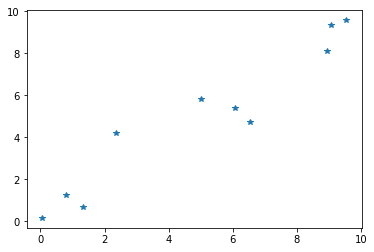

In [63]:
np.random.seed(101)
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
x_data= np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)
x_data
y_label=np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)
y_label
plt.plot(x_data,y_label,'*')

In [52]:
np.random.rand(2)

array([0.68530633, 0.51786747])

In [61]:
m=tf.Variable(0.685,dtype=np.float32,name="slope")
b=tf.Variable(0.517,dtype=np.float32,name="constant")

### Cost function

In [62]:
error=0
for x,y in zip(x_data,y_label):
    y_pred=m*x+b
    error +=(y-y_pred)**2

In [71]:
nr,dr=0,1
for x,y in zip(x_data,y_label):
    y_pred=m*x+b
    nr +=(y-y_pred)**2
    dr +=(y-np.mean(y_label))**2
r2=1-nr/dr

## Optimizer

In [76]:
optimizer= tf.train.GradientDescentOptimizer(learning_rate=0.0010)
train=optimizer.minimize(-r2)

## Intialize variable

In [77]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    epochs=100
    for i in range(epochs):
        sess.run(train)
    final_slope,final_intercept= sess.run([m,b])

In [78]:
final_slope,final_intercept

(0.787887, 0.5302365)

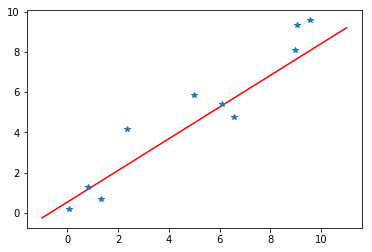

In [79]:
x_test= np.linspace(-1,11,10)
y_pred_plot=final_slope*x_test+final_intercept
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

Related to linear regression tensorflow has estimator class in will linearregression is availbele

In [19]:
import numpy as np
X_data= np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)
X_data

array([-1.38448591,  2.0841115 ,  1.15003442,  3.71924907,  4.1961591 ,
        4.25155593,  5.98718234,  6.47334568,  7.40514432,  9.4090656 ])

In [20]:
y_label=np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)
y_label

array([0.42851893, 0.68583432, 1.97359082, 3.55199171, 4.10545669,
       6.34183903, 7.13503819, 8.26415621, 7.41396908, 9.11394782])

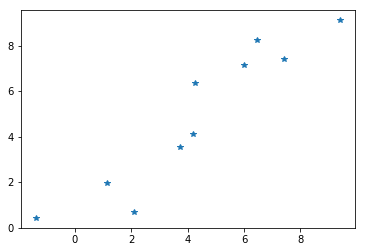

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_data,y_label,'*')

In [5]:
np.random.rand(2)

array([0.35738875, 0.76283456])

In [22]:
#y=mx+b
import tensorflow as tf
m=tf.Variable(0.59)
b=tf.Variable(0.47)

In [27]:
error=0
for x,y in zip(X_data,y_label):
    y_pred=m*x+b
    error+= (y-y_pred)**2

In [44]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train=optimizer.minimize(error)

In [45]:
init=tf.global_variables_initializer()

In [46]:
with tf.Session() as sess:
    sess.run(init)
    training_steps=10
    for i in range(training_steps):
        sess.run(train)
    f_slope,f_inter=sess.run([m,b])
print(f_slope,f_inter)

0.76576567 0.49966902


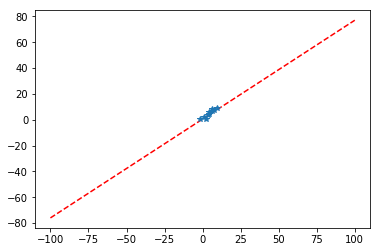

In [48]:
X_test= np.linspace(-100,100,10)
y_pred=f_slope*X_test+f_inter
plt.plot(X_test,y_pred,'--r')
plt.plot(X_data,y_label,'*')

In [49]:
x_data=np.linspace(0.0,10.0,100000)
noise=np.random.randn(len(x_data))

In [55]:
#y= mx+b
#b=5
y_true=0.5*x_data+5+noise

In [61]:
import pandas as pd
x_df=pd.DataFrame(data=x_data,columns=['X_data'])
y_df=pd.DataFrame(data=y_true,columns=['Y'])
my_data=pd.concat([x_df,y_df],axis=1)

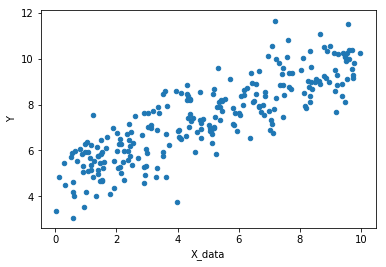

In [64]:
my_data.head()
my_data.sample(n=250).plot(kind='scatter',x='X_data',y='Y')

In [80]:
batch_size=8
np.random.random(2)

array([0.70586641, 0.359506  ])

In [81]:
m=tf.Variable(0.81)
b=tf.Variable(0.66)

In [82]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])
y_model=m*xph+b

In [83]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [84]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [85]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    batches=1000
    for i in range(batches):
        rand_id=np.random.randint(len(x_data),size=batch_size)
        feed={xph:x_data[rand_id],yph:y_true[rand_id]}
        sess.run(train,feed_dict=feed)
    model_m,model_inter=sess.run([m,b])

In [86]:
model_m,model_inter

(0.55209196, 4.9086757)

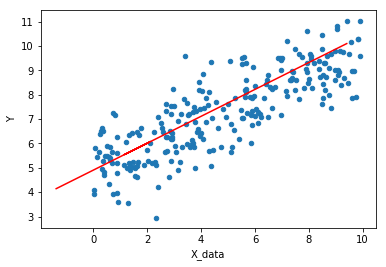

In [88]:
y_hat=X_data*model_m+model_inter
my_data.sample(n=250).plot(kind='scatter',x='X_data',y="Y")
plt.plot(X_data,y_hat,'r')